In [8]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from tracking import PatchMatchTracking
from eval import make_gif, mask_on_image, dice_assessment

In [2]:
root = '/home/gabriel/Téléchargements/sequences-train/sequences-train/'
name = 'swan' # name of the sequence : bag, bear, book, camel, rhino, swan
im_begin, im_end = 1, 26 # reference image (1) and last image (varies depending on the sequence)

In [3]:
imgs = []
masks = []
for k in range(1, 11):
    imgs.append(io.imread(root + name + '-%0*d.bmp'%(3,k)))
    masks.append(io.imread(root + name + '-%0*d.png'%(3,k)))

In [4]:
#Direct integration
tracker = PatchMatchTracking(p_size=7, pm_iter=13, n_iter=5, threshold=5, monte_carlo=True, smooth=True, sm_kernel=5)
esti_mask = tracker.track(imgs, masks[0])

  0%|          | 0/9 [00:00<?, ?it/s]

In [5]:
# esti_mask = tracker.thresholding(5)

In [6]:
# esti_mask = tracker.smoothing(kernel_size=5)

In [45]:
i = 1

In [46]:
t1, t2 = mask_on_image(imgs[i], esti_mask[i])
t3, t4 = mask_on_image(imgs[i], masks[i])

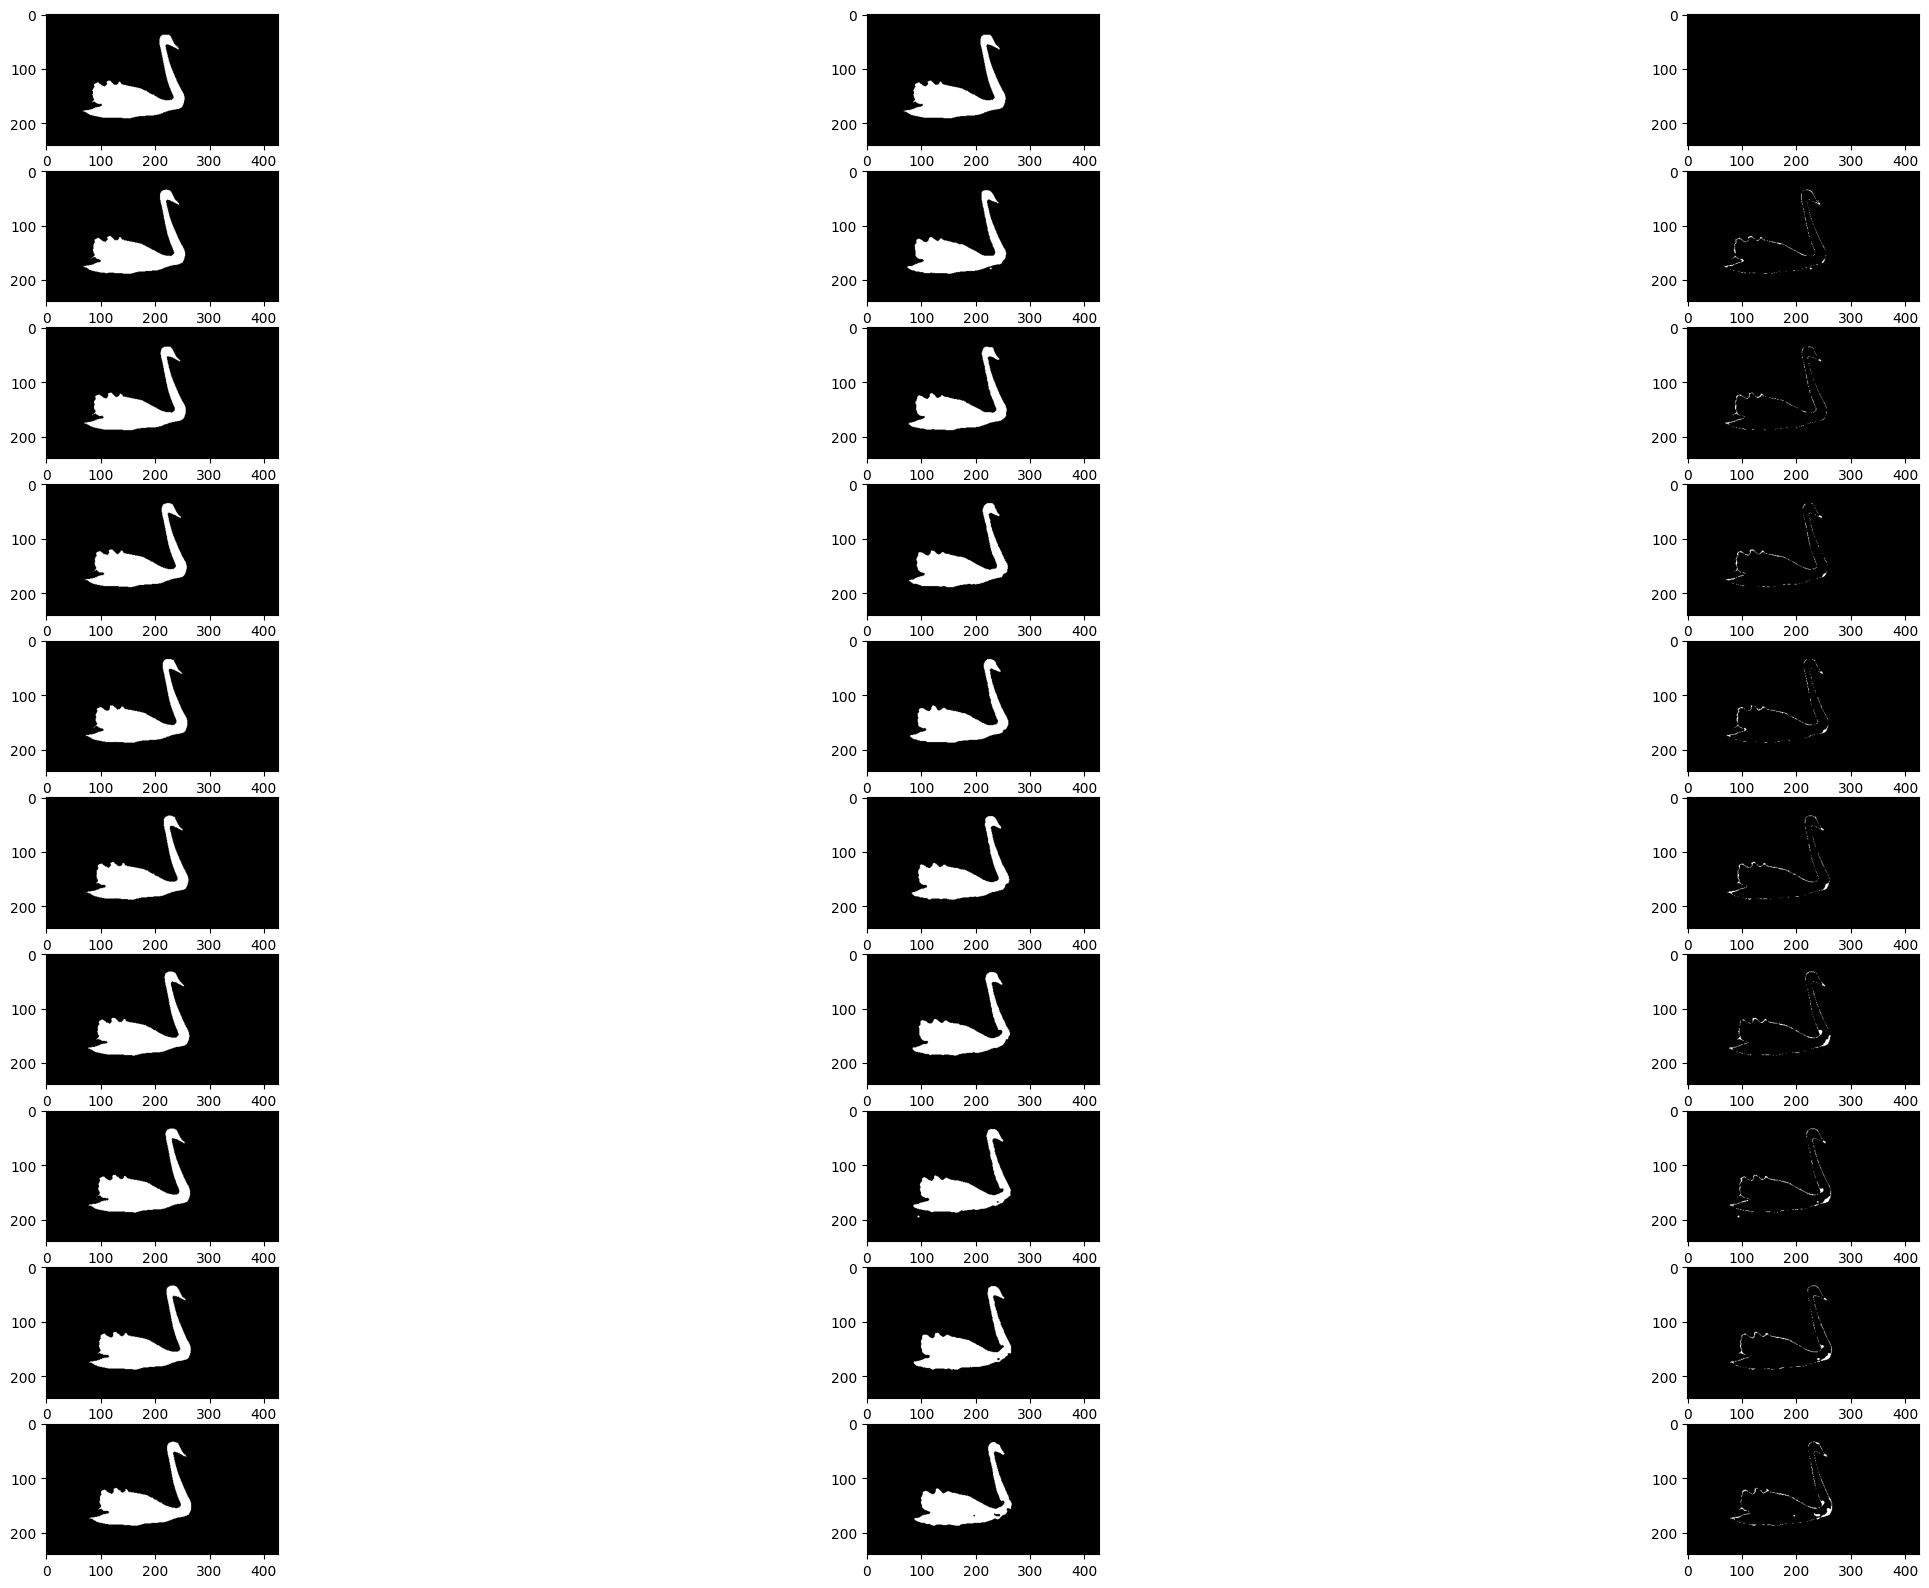

In [7]:
fig, axs = plt.subplots(len(esti_mask), 3, figsize=(30, 20))

for i in range(len(esti_mask)):
    axs[i,0].imshow(masks[i], cmap="gray")
    axs[i,1].imshow(esti_mask[i], cmap="gray")
    axs[i,2].imshow(np.abs(masks[i]-esti_mask[i]), cmap="gray")
plt.show()

In [11]:
list_dice1 = []
for i in range(len(esti_mask)):
    list_dice1.append(dice_assessment(masks[i], esti_mask[i], label=255))
print(np.mean(list_dice1))

97.22283147999869


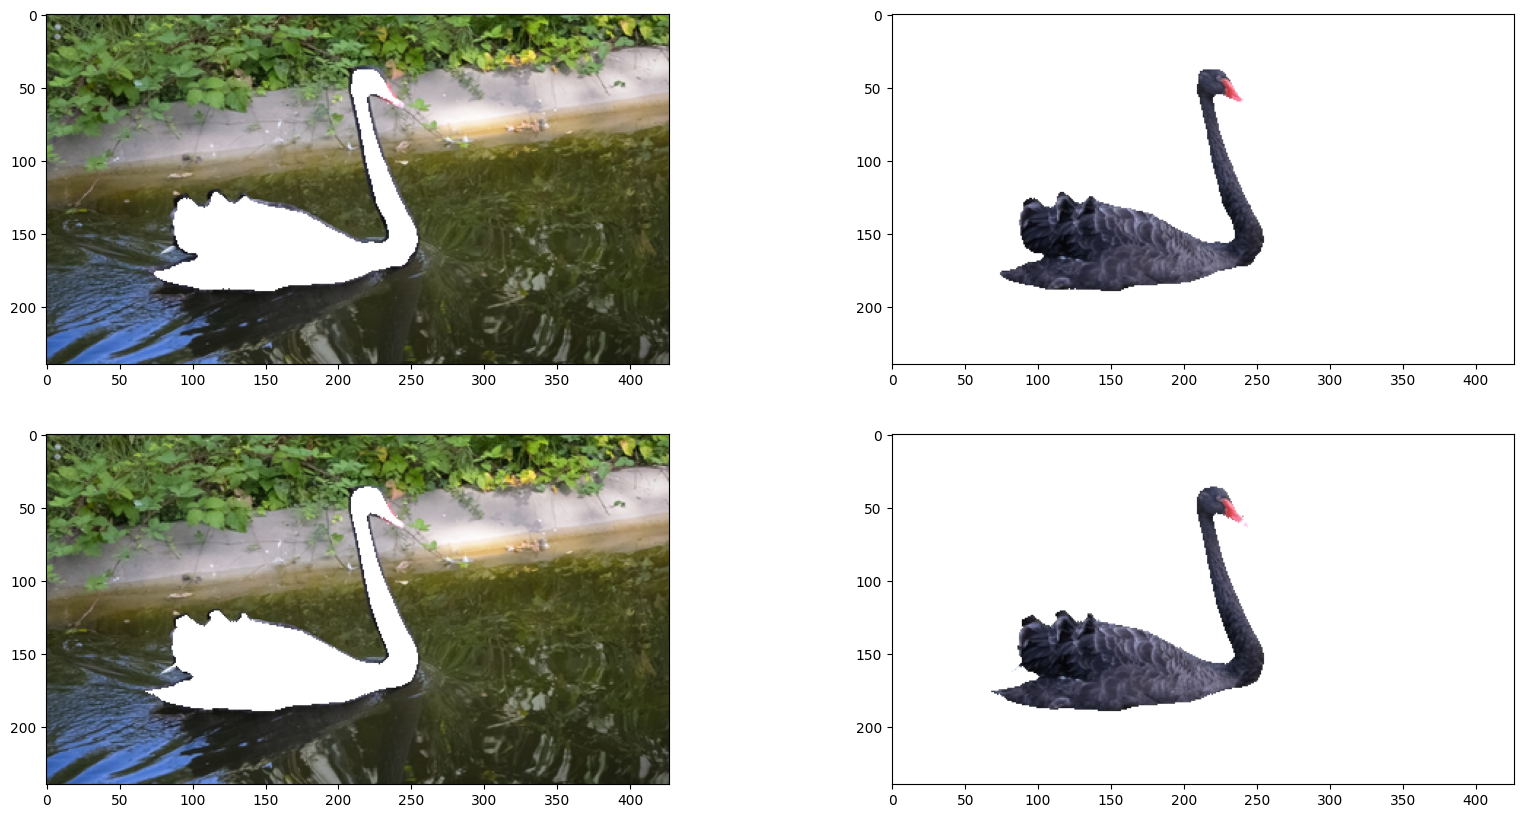

In [48]:
fig, axs = plt.subplots(2, 2,  figsize=(20,10))
axs[0, 0].imshow(t1)
axs[0, 1].imshow(t2)
axs[1, 0].imshow(t3)
axs[1, 1].imshow(t4)
plt.show()


In [55]:
make_gif(imgs, "swan")
make_gif(masks, "swan_masks")
make_gif(esti_mask, "esti_swan_masks")
make_gif([m - e_m for m, e_m in zip(masks, esti_mask)], "diff")

![display image](swan.gif)
![display image](swan_masks.gif)




![display image](esti_swan_masks.gif)
![display image](diff.gif)